# Multiple method comparison on penguins_data

In [40]:
from synthesizers import Load
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [41]:
# Read penguins data
penguins_real = pd.read_csv("Data\penguins_size.csv")
penguins_real = penguins_real.dropna()

target = "species"

gen_methods = ["tvae", "bayesian_network", "privbayes", "adsgan", "ctgan", "ddpm", "nflow"]

In [42]:
gen_count = penguins_real.shape[0]

state = Load(penguins_real).Synthesize(split_size=0.8, train_plugin=gen_methods, gen_count=gen_count, n_jobs=len(gen_methods), eval_target_col=target)

[2024-05-07T12:28:12.680130+0200][10144][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py


 65%|██████▌   | 650/1000 [01:41<00:54,  6.39it/s]
[2024-05-07T12:29:54.911621+0200][10144][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
[2024-05-07T12:29:56.953160+0200][10144][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
100%|██████████| 6/6 [00:00<00:00, 10.98it/s]
[2024-05-07T12:29:57.744043+0200][10144][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
  4%|▍         | 399/10000 [00:36<14:29, 11.05it/s]
[2024-05-07T12:30:34.185548+0200][10144][CRITICAL] module disabled: c:\Users\Qurri\AppData\Local\Programs\Python\Python310\lib\site-packages\synthcity\plugins\generic\plugin_goggle.py
 65%|██████▍   | 1299/2000 [02:01<01:05, 10.66it/s]
[2024-05-07T12:32:36.422520+0200][10144][CRITICAL] module disab

Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!
Error: AUROC metric did not run, analysis target variable did not have appropriate number levels (i.e. 2) or test data was not supplied!


In [43]:
state[0].eval

,metric,dim,val,err,n_val,n_err
0,avg_dwm_diff,u,0.006179,0.009016,0.993821,0.009016
1,pca_eigval_diff,u,0.279967,NaN,0.720033,NaN
2,pca_eigvec_ang,u,0.076837,NaN,0.975542,NaN
3,avg_cio,u,0.763601,0.071475,0.763601,0.071475
4,corr_mat_diff,u,2.007239,NaN,0.904417,NaN
5,mutual_inf_diff,u,1.229839,NaN,0.941436,NaN
6,ks_tvd_stat,u,0.083650,0.013312,0.916350,0.013312
7,frac_ks_sigs,u,0.285714,NaN,0.714286,NaN
8,avg_h_dist,u,0.015736,0.007711,0.984264,0.007711
9,avg_pMSE,u,0.003476,0.000635,0.986096,0.002541


In [56]:
res_df = pd.DataFrame({"Models": gen_methods})

pr_res, ut_res = [], []
for i in range(len(state)):
    pr_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'p']['n_val']))
    ut_res.append(np.mean(state[i].eval[state[i].eval['dim'] == 'u']['n_val']))

res_df["Utility"] = ut_res
res_df["Privacy"] = pr_res

res_df

,Models,Utility,Privacy
0,tvae,0.834733,0.758129
1,bayesian_network,0.892642,0.675050
2,privbayes,0.698904,0.783858
3,adsgan,0.743655,0.754357
4,ctgan,0.806713,0.740787
5,ddpm,0.807643,0.693176
6,nflow,0.817890,0.755985


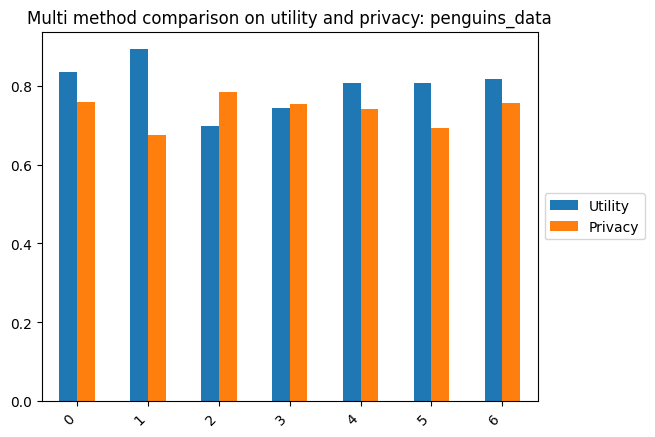

In [45]:
res_df.plot.bar()
plt.title("Multi method comparison on utility and privacy: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [46]:
results_f1 = pd.DataFrame(columns=["f1_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    results_f1.loc[gen_methods[i]] = [eval.loc["cls_F1_diff", "val"]]
results_f1

,f1_diff
tvae,0.103843
bayesian_network,0.059958
privbayes,0.228354
adsgan,0.108403
ctgan,0.069200
ddpm,0.042959
nflow,0.113225


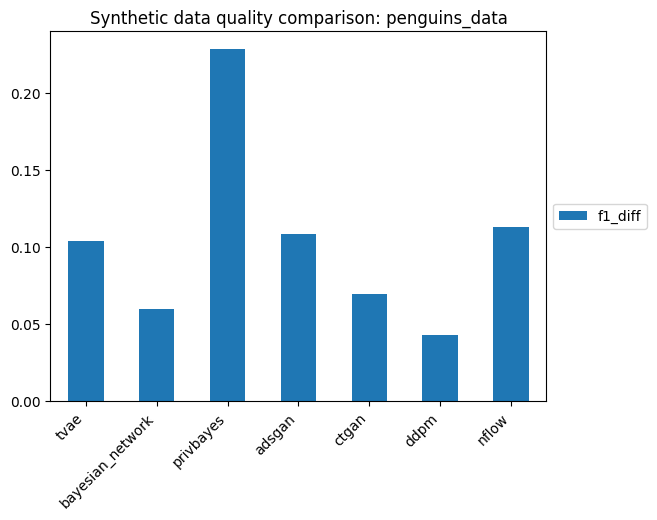

In [47]:
results_f1.plot.bar()
plt.title("Synthetic data quality comparison: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [48]:
privacy_results = pd.DataFrame(columns=["eps_identif_risk",
                                        "mia_cls_risk",
                                        "att_discl_risk"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    privacy_results.loc[gen_methods[i]] = [eval.loc["eps_identif_risk", "val"],
                                            eval.loc["mia_cls_risk", "val"],
                                            eval.loc["att_discl_risk", "val"]]
privacy_results

,eps_identif_risk,mia_cls_risk,att_discl_risk
tvae,0.161049,0.976471,0.452951
bayesian_network,0.441948,0.988235,0.500428
privbayes,0.089888,0.941176,0.365697
adsgan,0.232210,0.952941,0.464927
ctgan,0.292135,0.947059,0.463644
ddpm,0.430712,0.988235,0.506416
nflow,0.217228,0.982353,0.463644


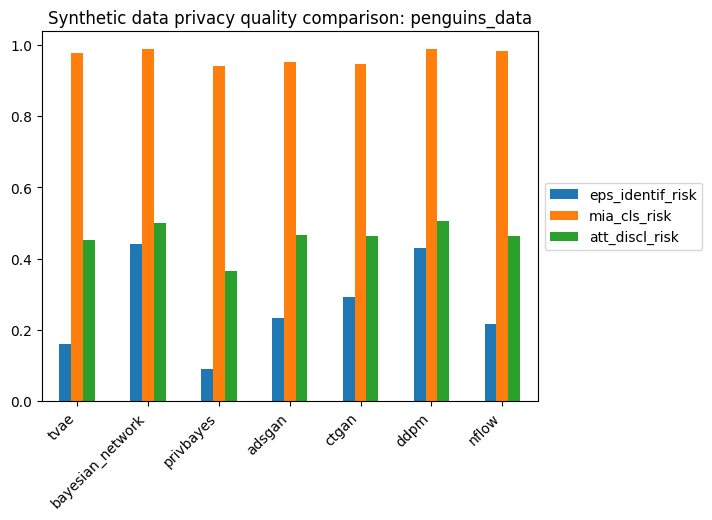

In [49]:
privacy_results.plot.bar()
plt.title("Synthetic data privacy quality comparison: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [50]:
utility_results = pd.DataFrame(columns=["avg_dwm_diff",
                                        "pca_eigval_diff",
                                        "pca_eigvec_ang"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    utility_results.loc[gen_methods[i]] = [eval.loc["avg_dwm_diff", "val"],
                                            eval.loc["pca_eigval_diff", "val"],
                                            eval.loc["pca_eigvec_ang", "val"]]
utility_results

,avg_dwm_diff,pca_eigval_diff,pca_eigvec_ang
tvae,0.006179,0.279967,0.076837
bayesian_network,0.007583,0.141901,0.157212
privbayes,0.033826,0.442644,1.242443
adsgan,0.061388,0.296742,0.216957
ctgan,0.037004,0.067593,0.033345
ddpm,0.027301,0.160337,0.422845
nflow,0.015660,0.222155,0.080454


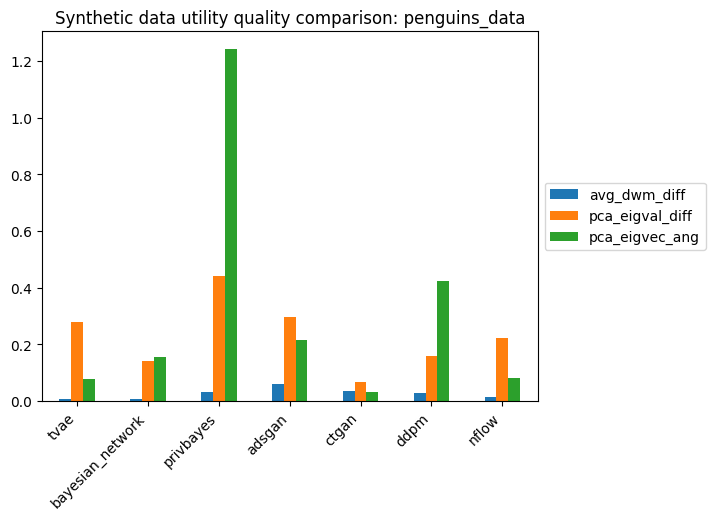

In [51]:
utility_results.plot.bar()
plt.title("Synthetic data utility quality comparison: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [52]:
matrix_results = pd.DataFrame(columns=["corr_mat_diff",
                                        "mutual_inf_diff"])

for i in range(len(gen_methods)):
    eval = state[i].eval.set_index("metric")
    matrix_results.loc[gen_methods[i]] = [eval.loc["corr_mat_diff", "val"],
                                            eval.loc["mutual_inf_diff", "val"]]
matrix_results

,corr_mat_diff,mutual_inf_diff
tvae,2.007239,1.229839
bayesian_network,1.165328,1.200188
privbayes,2.913355,0.752406
adsgan,1.492962,1.135235
ctgan,0.633526,1.149908
ddpm,1.514595,0.956244
nflow,1.690405,1.188108


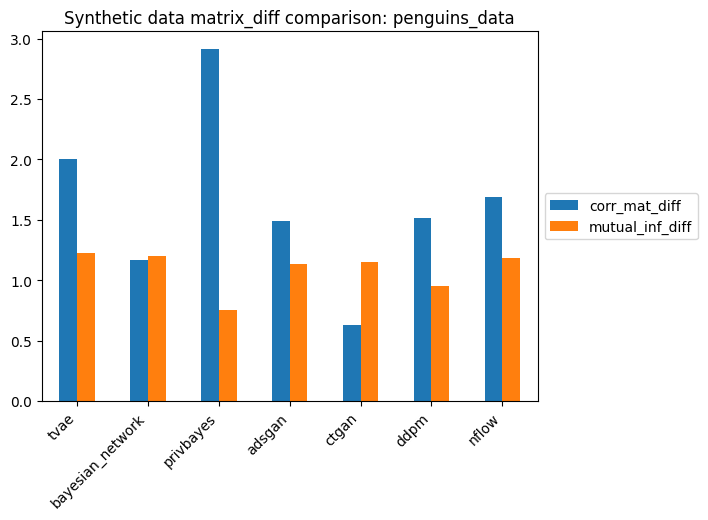

In [53]:
matrix_results.plot.bar()
plt.title("Synthetic data matrix_diff comparison: penguins_data")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()